In [21]:
# FHVHV 데이터
# 스파크 SQL을 이용하여 다시 데이터 분석을 진행
# 스파크 세션 import
from pyspark.sql import SparkSession

# 어플리케이션 생성
spark = SparkSession.builder.appName("trip_count_sql").getOrCreate()

In [23]:
data = spark.read.parquet("./data/fhvhv_tripdata_2023-01.parquet", inferSchema = True, header = True)
# 데이터 확인
data.show(5)
'''
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|           HV0003|              B03404|              B03404|2023-01-01 00:18:06|2023-01-01 00:19:24|2023-01-01 00:19:38|2023-01-01 00:48:07|          48|          68|      0.94|     1709|              25.95|  0.0|0.78|      2.3|                2.75|        0.0|5.22|     27.83|                  N|                N|                  |               N|             N|
|           HV0003|              B03404|              B03404|2023-01-01 00:48:42|2023-01-01 00:56:20|2023-01-01 00:58:39|2023-01-01 01:33:08|         246|         163|      2.78|     2069|              60.14|  0.0| 1.8|     5.34|                2.75|        0.0| 0.0|     50.15|                  N|                N|                  |               N|             N|
|           HV0003|              B03404|              B03404|2023-01-01 00:15:35|2023-01-01 00:20:14|2023-01-01 00:20:27|2023-01-01 00:37:54|           9|         129|      8.81|     1047|              24.37|  0.0|0.73|     2.16|                 0.0|        0.0| 0.0|     20.22|                  N|                N|                  |               N|             N|
|           HV0003|              B03404|              B03404|2023-01-01 00:35:24|2023-01-01 00:39:30|2023-01-01 00:41:05|2023-01-01 00:48:16|         129|         129|      0.67|      431|               13.8|  0.0|0.41|     1.22|                 0.0|        0.0| 0.0|       7.9|                  N|                N|                  |               N|             N|
|           HV0003|              B03404|              B03404|2023-01-01 00:43:15|2023-01-01 00:51:10|2023-01-01 00:52:47|2023-01-01 01:04:51|         129|          92|      4.38|      724|              20.49|  0.0|0.61|     1.82|                 0.0|        0.0| 0.0|     16.48|                  N|                N|                  |               N|             N|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
'''


+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

In [24]:
# "createOrReplaceTempView"는 Spark DataFrame을 임시적으로 SQL 테이블로 만들어 주는 메서드
# 이 메서드를 사용하여 DataFrame을 등록하면 SQL 쿼리를 사용하여 데이터를 분석하거나 변환할 수 있음
data.createOrReplaceTempView("mobility_data")

In [25]:
spark.sql("SELECT * FROM mobility_data LIMIT 5").show()
'''
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|           HV0003|              B03404|              B03404|2023-01-01 00:18:06|2023-01-01 00:19:24|2023-01-01 00:19:38|2023-01-01 00:48:07|          48|          68|      0.94|     1709|              25.95|  0.0|0.78|      2.3|                2.75|        0.0|5.22|     27.83|                  N|                N|                  |               N|             N|
|           HV0003|              B03404|              B03404|2023-01-01 00:48:42|2023-01-01 00:56:20|2023-01-01 00:58:39|2023-01-01 01:33:08|         246|         163|      2.78|     2069|              60.14|  0.0| 1.8|     5.34|                2.75|        0.0| 0.0|     50.15|                  N|                N|                  |               N|             N|
|           HV0003|              B03404|              B03404|2023-01-01 00:15:35|2023-01-01 00:20:14|2023-01-01 00:20:27|2023-01-01 00:37:54|           9|         129|      8.81|     1047|              24.37|  0.0|0.73|     2.16|                 0.0|        0.0| 0.0|     20.22|                  N|                N|                  |               N|             N|
|           HV0003|              B03404|              B03404|2023-01-01 00:35:24|2023-01-01 00:39:30|2023-01-01 00:41:05|2023-01-01 00:48:16|         129|         129|      0.67|      431|               13.8|  0.0|0.41|     1.22|                 0.0|        0.0| 0.0|       7.9|                  N|                N|                  |               N|             N|
|           HV0003|              B03404|              B03404|2023-01-01 00:43:15|2023-01-01 00:51:10|2023-01-01 00:52:47|2023-01-01 01:04:51|         129|          92|      4.38|      724|              20.49|  0.0|0.61|     1.82|                 0.0|        0.0| 0.0|     16.48|                  N|                N|                  |               N|             N|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+'''



+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+
|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|
+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+--

'\n+---+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+--------------------+-----------+----+----------+-------------------+-----------------+------------------+----------------+--------------+\n|_c0|hvfhs_license_num|dispatching_base_num|originating_base_num|   request_datetime|  on_scene_datetime|    pickup_datetime|   dropoff_datetime|PULocationID|DOLocationID|trip_miles|trip_time|base_passenger_fare|tolls| bcf|sales_tax|congestion_surcharge|airport_fee|tips|driver_pay|shared_request_flag|shared_match_flag|access_a_ride_flag|wav_request_flag|wav_match_flag|\n+---+-----------------+--------------------+--------------------+-------------------+-------------------+-------------------+-------------------+------------+------------+----------+---------+-------------------+-----+----+---------+------------------

In [27]:
# 일별 트립 수
spark.sql("SELECT pickup_date, COUNT(*) AS trips FROM (SELECT split(pickup_datetime, ' ')[0] AS pickup_date FROM mobility_data) GROUP BY pickup_date order by pickup_date asc ").show()
'''
+-----------+------+
|pickup_date| trips|
+-----------+------+
| 2020-03-02|648990|
| 2020-03-01|784260|
| 2020-03-03|697880|
| 2020-03-04|707879|
| 2020-03-05|731165|
| 2020-03-06|872012|
| 2020-03-07|886071|
| 2020-03-08|731222|
| 2020-03-09|628940|
| 2020-03-10|626474|
| 2020-03-11|628601|
| 2020-03-12|643257|
| 2020-03-13|660914|
| 2020-03-15|448125|
| 2020-03-14|569397|
| 2020-03-16|391518|
| 2020-03-17|312298|
| 2020-03-20|261900|
| 2020-03-19|252773|
| 2020-03-18|269233|
+-----------+------+
only showing top 20 rows

+-----------+------+
|pickup_date| trips|
+-----------+------+
| 2023-01-01|629154|
| 2023-01-02|408084|
| 2023-01-03|477829|
| 2023-01-04|494039|
| 2023-01-05|517870|
| 2023-01-06|608222|
| 2023-01-07|651016|
| 2023-01-08|555352|
| 2023-01-09|483799|
| 2023-01-10|511272|
| 2023-01-11|543997|
| 2023-01-12|611478|
| 2023-01-13|660421|
| 2023-01-14|747024|
| 2023-01-15|675746|
| 2023-01-16|512620|
| 2023-01-17|537334|
| 2023-01-18|554173|
| 2023-01-19|673867|
| 2023-01-20|677522|
+-----------+------+
only showing top 20 rows
'''

+-----------+------+
|pickup_date| trips|
+-----------+------+
| 2023-01-01|629154|
| 2023-01-02|408084|
| 2023-01-03|477829|
| 2023-01-04|494039|
| 2023-01-05|517870|
| 2023-01-06|608222|
| 2023-01-07|651016|
| 2023-01-08|555352|
| 2023-01-09|483799|
| 2023-01-10|511272|
| 2023-01-11|543997|
| 2023-01-12|611478|
| 2023-01-13|660421|
| 2023-01-14|747024|
| 2023-01-15|675746|
| 2023-01-16|512620|
| 2023-01-17|537334|
| 2023-01-18|554173|
| 2023-01-19|673867|
| 2023-01-20|677522|
+-----------+------+
only showing top 20 rows



'\n+-----------+------+\n|pickup_date| trips|\n+-----------+------+\n| 2020-03-02|648990|\n| 2020-03-01|784260|\n| 2020-03-03|697880|\n| 2020-03-04|707879|\n| 2020-03-05|731165|\n| 2020-03-06|872012|\n| 2020-03-07|886071|\n| 2020-03-08|731222|\n| 2020-03-09|628940|\n| 2020-03-10|626474|\n| 2020-03-11|628601|\n| 2020-03-12|643257|\n| 2020-03-13|660914|\n| 2020-03-15|448125|\n| 2020-03-14|569397|\n| 2020-03-16|391518|\n| 2020-03-17|312298|\n| 2020-03-20|261900|\n| 2020-03-19|252773|\n| 2020-03-18|269233|\n+-----------+------+\nonly showing top 20 rows\n'

위의 RDD보다는 간편하게 해결 가능
이제는 각 행정구 별 데이터를 확인해보자


## 각 헹정구 별 데이터
TLC Trip Record Data - Taxi Zone Lookup Table CSV 파일을 다운로드
로케이션 아이디의 정보가 담겨있는 파일이다. 조인하여 분석

In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("trip_count_by_zone_sql").getOrCreate()

In [3]:
trip_data = spark.read.parquet("./data/fhvhv_tripdata_2023-01.parquet", inferSchema = True, header = True)
zone_data = spark.read.csv("./data/taxi+_zone_lookup.csv", inferSchema = True, header = True)

In [4]:
# sql 사용을 위한 테이블 생성
trip_data.createOrReplaceTempView("trip_data")
zone_data.createOrReplaceTempView("zone_data")

In [32]:
# 행정구 별 승차하는 승객
spark.sql('SELECT borough, COUNT(*) FROM\
            (SELECT zone_data.Borough AS borough\
            FROM trip_data\
            JOIN zone_data ON trip_data.PULocationID = zone_data.LocationID)\
        GROUP BY borough').show()
'''
+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 2437394|
|          EWR|     362|
|      Unknown|     845|
|     Brooklyn| 3735765|
|Staten Island|  178818|
|    Manhattan| 4953147|
|        Bronx| 2086597|
+-------------+--------+
23-01
+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 3666870|
|          EWR|       4|
|      Unknown|     992|
|     Brooklyn| 4784586|
|Staten Island|  249800|
|    Manhattan| 7578803|
|        Bronx| 2197976|
+-------------+--------+
'''

+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 3666870|
|          EWR|       4|
|      Unknown|     992|
|     Brooklyn| 4784586|
|Staten Island|  249800|
|    Manhattan| 7578803|
|        Bronx| 2197976|
+-------------+--------+



'\n+-------------+--------+\n|      borough|count(1)|\n+-------------+--------+\n|       Queens| 2437394|\n|          EWR|     362|\n|      Unknown|     845|\n|     Brooklyn| 3735765|\n|Staten Island|  178818|\n|    Manhattan| 4953147|\n|        Bronx| 2086597|\n+-------------+--------+\n'

In [33]:
# 행정구 별 하차하는 승객을 구해본다.
spark.sql('SELECT borough, COUNT(*) FROM\
            (SELECT zone_data.Borough AS borough\
            FROM trip_data\
            JOIN zone_data ON trip_data.PULocationID = zone_data.LocationID)\
        GROUP BY borough').show()
'''
+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 2437394|
|          EWR|     362|
|      Unknown|     845|
|     Brooklyn| 3735765|
|Staten Island|  178818|
|    Manhattan| 4953147|
|        Bronx| 2086597|
+-------------+--------+

+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 3666870|
|          EWR|       4|
|      Unknown|     992|
|     Brooklyn| 4784586|
|Staten Island|  249800|
|    Manhattan| 7578803|
|        Bronx| 2197976|
+-------------+--------+
'''

+-------------+--------+
|      borough|count(1)|
+-------------+--------+
|       Queens| 3666870|
|          EWR|       4|
|      Unknown|     992|
|     Brooklyn| 4784586|
|Staten Island|  249800|
|    Manhattan| 7578803|
|        Bronx| 2197976|
+-------------+--------+



'\n+-------------+--------+\n|      borough|count(1)|\n+-------------+--------+\n|       Queens| 2437394|\n|          EWR|     362|\n|      Unknown|     845|\n|     Brooklyn| 3735765|\n|Staten Island|  178818|\n|    Manhattan| 4953147|\n|        Bronx| 2086597|\n+-------------+--------+\n'

승차든 하차든 맨해튼의 수가 굉장히 많은 걸 볼 수있다.

본격적으로 택시 요금 예측 머신 러닝에 쓰일 데이터를 분석한다.

뉴욕의 택시 데이터 TLC Trip Record Data - 2021년 1월부터 7월까지의 ‘Yellow Taxi Trip Records’ CSV파일을 다운

# 택시 요금 예측위한 yellow taxi trip records 202201 - 202207 데이터 전처리 (이상치 제거 등)


In [5]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("taxi-analysis").getOrCreate()

trips_df = spark.read.parquet("./data/trips_2022/*", inferSchema=True, header=True) # 여러개 파일 동시에
zone_df = spark.read.csv("./data/taxi+_zone_lookup.csv", inferSchema=True, header=True)

In [6]:
trips_df.createOrReplaceTempView("trips")
zone_df.createOrReplaceTempView("zone")

In [7]:
trips_df.printSchema()
zone_df.printSchema()
'''
root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)
'''

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zo

'\nroot\n |-- VendorID: long (nullable = true)\n |-- tpep_pickup_datetime: timestamp (nullable = true)\n |-- tpep_dropoff_datetime: timestamp (nullable = true)\n |-- passenger_count: double (nullable = true)\n |-- trip_distance: double (nullable = true)\n |-- RatecodeID: double (nullable = true)\n |-- store_and_fwd_flag: string (nullable = true)\n |-- PULocationID: long (nullable = true)\n |-- DOLocationID: long (nullable = true)\n |-- payment_type: long (nullable = true)\n |-- fare_amount: double (nullable = true)\n |-- extra: double (nullable = true)\n |-- mta_tax: double (nullable = true)\n |-- tip_amount: double (nullable = true)\n |-- tolls_amount: double (nullable = true)\n |-- improvement_surcharge: double (nullable = true)\n |-- total_amount: double (nullable = true)\n |-- congestion_surcharge: double (nullable = true)\n |-- airport_fee: double (nullable = true)\n\nroot\n |-- LocationID: integer (nullable = true)\n |-- Borough: string (nullable = true)\n |-- Zone: string (nulla

In [8]:
# 불러온 두 데이터 프레임을 조인하고, 필요한 컬럼만 선택
query = """
select
    t.VendorID as vendor_id,
    TO_DATE(t.tpep_pickup_datetime) as pickup_date,
    TO_DATE(t.tpep_dropoff_datetime) as dropoff_date,
    HOUR(t.tpep_pickup_datetime) as pickup_time,
    HOUR(t.tpep_dropoff_datetime) as dropoff_time,
    t.passenger_count,
    t.trip_distance,
    t.fare_amount,
    t.tip_amount,
    t.tolls_amount,
    t.total_amount,
    t.payment_type,
    pz.Zone as pickup_zone,
    dz.Zone as dropoff_zone
from
    trips t
    left join
        zone pz
    on
        t.PULocationID = pz.LocationID
    left join
        zone dz
    on
        t.DOLocationID = dz.LocationID
"""

comb_df = spark.sql(query)

In [9]:
# 새로운 TempView에 담는다.
comb_df.createOrReplaceTempView("comb")

In [39]:
comb_df.printSchema()
'''
root
 |-- vendor_id: long (nullable = true)
 |-- pickup_date: date (nullable = true)
 |-- dropoff_date: date (nullable = true)
 |-- pickup_time: integer (nullable = true)
 |-- dropoff_time: integer (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- pickup_zone: string (nullable = true)
 |-- dropoff_zone: string (nullable = true)
'''

root
 |-- vendor_id: long (nullable = true)
 |-- pickup_date: date (nullable = true)
 |-- dropoff_date: date (nullable = true)
 |-- pickup_time: integer (nullable = true)
 |-- dropoff_time: integer (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- pickup_zone: string (nullable = true)
 |-- dropoff_zone: string (nullable = true)



'\nroot\n |-- vendor_id: string (nullable = true)\n |-- pickup_date: date (nullable = true)\n |-- dropoff_date: date (nullable = true)\n |-- pickup_time: integer (nullable = true)\n |-- dropoff_time: integer (nullable = true)\n |-- passenger_count: string (nullable = true)\n |-- trip_distance: string (nullable = true)\n |-- fare_amount: string (nullable = true)\n |-- tip_amount: string (nullable = true)\n |-- tolls_amount: string (nullable = true)\n |-- total_amount: string (nullable = true)\n |-- payment_type: string (nullable = true)\n |-- pickup_zone: string (nullable = true)\n |-- dropoff_zone: string (nullable = true)\n'

In [42]:
# 이상한 데이터가 있는 지 확인한다.
spark.sql("SELECT pickup_date, pickup_time FROM comb WHERE pickup_date < '2021-12-31' order by pickup_date").show()
'''
+-----------+-----------+
|pickup_date|pickup_time|
+-----------+-----------+
| 2001-01-01|          0|
| 2001-01-01|          0|
| 2001-01-01|          1|
| 2001-01-01|          1|
| 2001-01-01|          1|
| 2001-08-23|          5|
| 2002-10-21|          0|
| 2002-10-21|          0|
| 2002-10-21|         10|
| 2002-10-21|          8|
| 2002-10-21|          9|
| 2002-10-21|          9|
| 2002-10-21|         10|
| 2002-10-21|          0|
| 2002-10-21|          5|
| 2002-10-21|          9|
| 2002-10-21|          5|
| 2002-10-21|          9|
| 2002-10-21|          1|
| 2002-10-21|         10|
+-----------+-----------+
'''
# 2022년 1월부터 9월까지의 데이터인데 01 ~ 09 데이터가 있다.

+-----------+-----------+
|pickup_date|pickup_time|
+-----------+-----------+
| 2001-01-01|          0|
| 2001-01-01|          0|
| 2001-01-01|          1|
| 2001-01-01|          1|
| 2001-01-01|          1|
| 2001-08-23|          5|
| 2002-10-21|          0|
| 2002-10-21|          0|
| 2002-10-21|         10|
| 2002-10-21|          8|
| 2002-10-21|          9|
| 2002-10-21|          9|
| 2002-10-21|         10|
| 2002-10-21|          0|
| 2002-10-21|          5|
| 2002-10-21|          9|
| 2002-10-21|          5|
| 2002-10-21|          9|
| 2002-10-21|          1|
| 2002-10-21|         10|
+-----------+-----------+
only showing top 20 rows



'\n+-----------+-----------+\n|pickup_date|pickup_time|\n+-----------+-----------+\n| 2008-12-31|         23|\n| 2009-01-01|          0|\n| 2009-01-01|          1|\n| 2009-01-01|          0|\n| 2009-01-01|          0|\n| 2009-01-01|          0|\n| 2009-01-01|          2|\n| 2008-12-31|         23|\n| 2009-01-01|          0|\n| 2008-12-31|         23|\n| 2008-12-31|         23|\n| 2009-01-01|          0|\n| 2008-12-31|         23|\n| 2008-12-31|         23|\n| 2009-01-01|          0|\n| 2003-01-01|          0|\n| 2008-12-31|         23|\n| 2009-01-01|          4|\n| 2009-01-01|          2|\n| 2008-12-31|         23|\n+-----------+-----------+\n'

In [43]:
# 요금의 요약 확인
# total_amount 컬럼에 대한 통계를 반환한다. describe
comb_df.select("total_amount").describe().show()
'''
+-------+------------------+
|summary|      total_amount|
+-------+------------------+
|  count|          29328421|
|   mean|21.220920009777455|
| stddev|111.48017589454689|
|    min|           -2567.8|
|    max|         401095.62|
+-------+------------------+
'''

+-------+------------------+
|summary|      total_amount|
+-------+------------------+
|  count|          29328421|
|   mean|21.220920009777455|
| stddev|111.48017589454689|
|    min|           -2567.8|
|    max|         401095.62|
+-------+------------------+



'\n+-------+------------------+\n|summary|      total_amount|\n+-------+------------------+\n|  count|          14265260|\n|   mean|3.7378463056558773|\n| stddev| 6.424498387076673|\n|    min|             -0.35|\n|    max|             99.96|\n+-------+------------------+\n'

In [44]:
comb_df.select("trip_distance").describe().show()
'''
+-------+-----------------+
|summary|    trip_distance|
+-------+-----------------+
|  count|         29328421|
|   mean|6.031617876735225|
| stddev|610.0890633579236|
|    min|              0.0|
|    max|        357192.65|
+-------+-----------------+
'''
# 574845km ..?

+-------+-----------------+
|summary|    trip_distance|
+-------+-----------------+
|  count|         29328421|
|   mean|6.031617876735225|
| stddev|610.0890633579236|
|    min|              0.0|
|    max|        357192.65|
+-------+-----------------+



'\n+-------+------------------+\n|summary|     trip_distance|\n+-------+------------------+\n|  count|          14265260|\n|   mean|1.3902634392923723|\n| stddev|122.06692195114893|\n|    min|               0.0|\n|    max|              99.0|\n+-------+------------------+\n'

In [46]:
comb_df.select("passenger_count").describe().show()
'''
+-------+------------------+
|summary|   passenger_count|
+-------+------------------+
|  count|          28341560|
|   mean|1.4019841885908892|
| stddev|0.9713859381512026|
|    min|               0.0|
|    max|               9.0|
+-------+------------------+
'''
#승객 수 평균 1명 내외 9명 최대

+-------+------------------+
|summary|   passenger_count|
+-------+------------------+
|  count|          28341560|
|   mean|1.4019841885908892|
| stddev|0.9713859381512026|
|    min|               0.0|
|    max|               9.0|
+-------+------------------+



'\n+-------+------------------+\n|summary|   passenger_count|\n+-------+------------------+\n|  count|          28341560|\n|   mean|1.4019841885908892|\n| stddev|0.9713859381512026|\n|    min|               0.0|\n|    max|               9.0|\n+-------+------------------+\n'

In [47]:
# 월 단위로 데이터를 그룹핑하여 확인한다.
query = """
SELECT
     DATE_TRUNC('MM', c.pickup_date) AS month,
     COUNT(*) AS trips
FROM
    comb c
GROUP BY
    month
ORDER BY
    month desc
"""
spark.sql(query).show()
'''
+-------------------+-------+
|              month|  trips|
+-------------------+-------+
|2023-04-01 00:00:00|      1|
|2022-10-01 00:00:00|     19|
|2022-09-01 00:00:00|3183706|
|2022-08-01 00:00:00|3152694|
|2022-07-01 00:00:00|3174363|
|2022-06-01 00:00:00|3557692|
|2022-05-01 00:00:00|3588292|
|2022-04-01 00:00:00|3599902|
|2022-03-01 00:00:00|3627888|
|2022-02-01 00:00:00|2979419|
|2022-01-01 00:00:00|2463900|
|2021-12-01 00:00:00|     24|
|2012-02-01 00:00:00|      1|
|2009-01-01 00:00:00|     35|
|2008-12-01 00:00:00|     30|
|2003-01-01 00:00:00|      9|
|2002-12-01 00:00:00|      1|
|2002-10-01 00:00:00|    439|
|2001-08-01 00:00:00|      1|
|2001-01-01 00:00:00|      5|
+-------------------+-------+
'''
# 1월부터 9월 외의 데이터를 삭제하자

+-------------------+-------+
|              month|  trips|
+-------------------+-------+
|2023-04-01 00:00:00|      1|
|2022-10-01 00:00:00|     19|
|2022-09-01 00:00:00|3183706|
|2022-08-01 00:00:00|3152694|
|2022-07-01 00:00:00|3174363|
|2022-06-01 00:00:00|3557692|
|2022-05-01 00:00:00|3588292|
|2022-04-01 00:00:00|3599902|
|2022-03-01 00:00:00|3627888|
|2022-02-01 00:00:00|2979419|
|2022-01-01 00:00:00|2463900|
|2021-12-01 00:00:00|     24|
|2012-02-01 00:00:00|      1|
|2009-01-01 00:00:00|     35|
|2008-12-01 00:00:00|     30|
|2003-01-01 00:00:00|      9|
|2002-12-01 00:00:00|      1|
|2002-10-01 00:00:00|    439|
|2001-08-01 00:00:00|      1|
|2001-01-01 00:00:00|      5|
+-------------------+-------+



'\n+-------------------+-------+\n|              month|  trips|\n+-------------------+-------+\n|2029-05-01 00:00:00|      1|\n|2021-12-01 00:00:00|      5|\n|2021-11-01 00:00:00|      5|\n|2021-10-01 00:00:00|      3|\n|2021-09-01 00:00:00|      3|\n|2021-08-01 00:00:00|   1159|\n|2021-07-01 00:00:00|2821299|\n|2021-06-01 00:00:00|2833939|\n|2021-05-01 00:00:00|2507419|\n|2021-04-01 00:00:00|2170653|\n|2021-03-01 00:00:00|1925076|\n|2021-02-01 00:00:00|1371472|\n|2021-01-01 00:00:00|1369746|\n|2020-12-01 00:00:00|     16|\n|2009-01-01 00:00:00|    120|\n|2008-12-01 00:00:00|     17|\n|2004-04-01 00:00:00|      1|\n|2003-01-01 00:00:00|      2|\n+-------------------+-------+\n'

In [10]:
# 데이터 정제 , 위 통계들을 이용해서 이상치들을 제거
# 대충 자료를 확인했으니 유의미한 범위만 가져오기 위해 DATA Clearning 을 해준다.

query = """
SELECT
    *
FROM 
    comb c
WHERE
    c.total_amount > 0
    AND c.trip_distance < 100
    AND c.passenger_count < 5
    AND c.pickup_date >= '2022-01-01'
    AND c.pickup_date < '2022-08-01'
"""
cleaned_df = spark.sql(query)
cleaned_df.createOrReplaceTempView("cleaned")


cleaned_df.describe().show()
'''
# 한 5분 걸린듯, 2021년도 데이터는 코로나 떄문에 그렇게 많지 않았는데 22년은 두배정도 증가해서 시간이 오래 걸린듯
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|summary|         vendor_id|       pickup_time|      dropoff_time|   passenger_count|    trip_distance|       fare_amount|        tip_amount|      tolls_amount|      total_amount|      payment_type|         pickup_zone|        dropoff_zone|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|  count|          21375081|          21375081|          21375081|          21375081|         21375081|          21375081|          21375081|          21375081|          21375081|          21375081|            21375081|            21375081|
|   mean| 1.691322713584103|14.211830168035387|14.271991998533245| 1.270071350840729|3.400306013810737|14.279714251845917|2.6438545425863222|0.5046559748729831| 20.98173047146351|1.2148672091581783|                null|                null|
| stddev|0.4619476477374937| 5.698015858810744| 5.792093559143489|0.6566209949026152|4.367761997659087|123.15858655779881| 3.189008557288142|1.9730435461966254|123.56483726377675|0.4284036103143851|                null|                null|
|    min|                 1|                 0|                 0|               0.0|              0.0|              -0.8|               0.0|               0.0|              0.01|                 1|Allerton/Pelham G...|Allerton/Pelham G...|
|    max|                 2|                23|                23|               4.0|            99.59|         401092.32|           1400.16|            911.87|         401095.62|                 5|      Yorkville West|      Yorkville West|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+'''

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|summary|         vendor_id|       pickup_time|      dropoff_time|   passenger_count|    trip_distance|       fare_amount|        tip_amount|      tolls_amount|      total_amount|      payment_type|         pickup_zone|        dropoff_zone|
+-------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+
|  count|          21375081|          21375081|          21375081|          21375081|         21375081|          21375081|          21375081|          21375081|          21375081|          21375081|            21375081|            21375081|
|   mean| 1.691322713584103|14.21183

'\n+-------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+\n|summary|          vendor_id|       pickup_time|      dropoff_time|   passenger_count|    trip_distance|       fare_amount|         tip_amount|       tolls_amount|      total_amount|      payment_type|         pickup_zone|        dropoff_zone|\n+-------+-------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+-------------------+------------------+------------------+--------------------+--------------------+\n|  count|           11821511|          11821511|           1207792|          11821511|         11821511|          11821511|           11821511|           11821511|          11821511|          11821511|            11821511|            11821511|\n|   mean| 1.66068

In [11]:
#분석 및 시각화
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

<AxesSubplot: xlabel='pickup_date', ylabel='trips'>

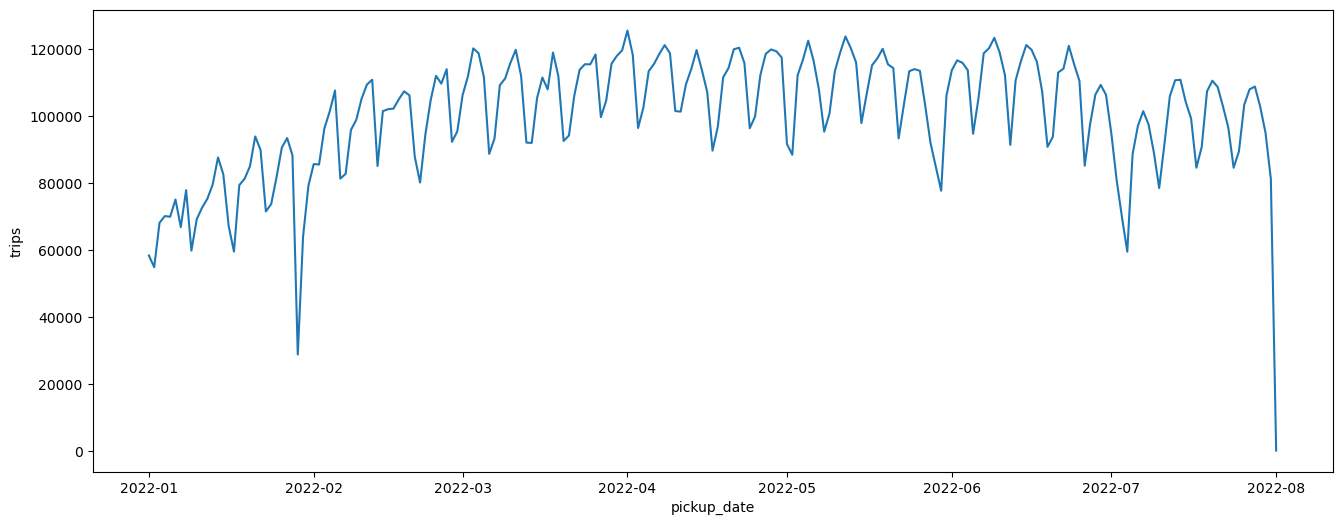

In [12]:
#일 별 운행 수
query = """
SELECT 
    c.pickup_date,
    COUNT(*) AS trips
FROM
    cleaned c
GROUP BY
    c.pickup_date
"""
pd_df = spark.sql(query).toPandas() # 그래프를 그려야하기 때문에 판다스로 보낸다.

fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(x="pickup_date", y="trips", data=pd_df)
# 코로나 완화로 인한 승객수 증가, 중간에 하락하는 구간으로 위클리 패턴 존재 확인


In [13]:
#요일 별 운행 수
query = """
SELECT 
    c.pickup_date,
    DATE_FORMAT(c.pickup_date, 'EEEE') AS day_of_week,
    COUNT(*) AS trips
FROM
    cleaned c
GROUP BY
    c.pickup_date,
    day_of_week
"""
pd_df2 = spark.sql(query).toPandas()

# 요일 별 정렬을 위해 컬럼을 하나 만든다.
data = pd_df2.groupby("day_of_week").trips.median().to_frame().reset_index()
data["sort_dow"] = data["day_of_week"].replace({
    "Sunday": 0,
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
})


data.sort_values(by="sort_dow", inplace=True)
data

,day_of_week,trips,sort_dow
3,Sunday,88729.0,0
1,Monday,93336.0,1
5,Tuesday,106399.5,2
6,Wednesday,111736.5,3
4,Thursday,114556.5,4
0,Friday,114642.0,5
2,Saturday,108054.0,6


<AxesSubplot: xlabel='day_of_week', ylabel='trips'>

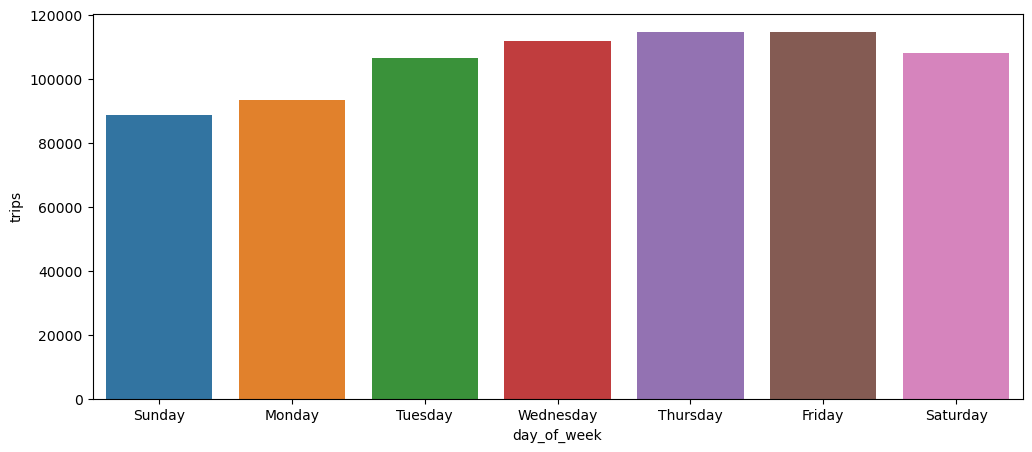

In [14]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(
    x="day_of_week",
    y="trips",
    data=data
)
# 확실히 주말보다 평일이 택시 운행량이 많은 것을 확인할 수 있다.
# 일요일이 가장 적고, 금요일이 가장 많다.


In [51]:
# 요일 생성 함수 생성 - 위 쿼리를 사용해도 되지만 함수를 이런식으로 만들 수도 있다.
def get_weekday(data):
    import calendar
    return calendar.day_name[date.weekday()]

spark.udf.register("get_weekday", get_weekday)


query = """
SELECT 
    c.pickup_date,
    get_weekday(c.pickup_date) AS day_of_week,
    COUNT(*) AS trips
FROM
    cleaned c
GROUP BY
    c.pickup_date,
    day_of_week
"""

In [26]:
# 결제 타입 패턴
payment_type_to_string = {
    '1': "Credit Card",
    '2': "Cash",
    '3': "No Charge",
    '4': "Dispute",     # 분쟁O
    '5': "Unknown",
    '6': "Voided Trip", # 취소
}

def parse_payment_type(payment_type):
    if str(payment_type) not in payment_type_to_string.keys():
        return 'what is it'
    else:
        return payment_type_to_string[str(payment_type)]
        

spark.udf.register("parse_payment_type", parse_payment_type)

<function __main__.parse_payment_type(payment_type)>

In [27]:
query = """
SELECT 
    parse_payment_type(payment_type),
    count(*) AS trips,
    MEAN(fare_amount) AS mean_fare_amount,
    STD(fare_amount) AS stdev_fare_amount
FROM
    cleaned
GROUP BY
    payment_type
"""

spark.sql(query).show()

+--------------------------------+--------+------------------+------------------+
|parse_payment_type(payment_type)|   trips|  mean_fare_amount| stdev_fare_amount|
+--------------------------------+--------+------------------+------------------+
|                     Credit Card|16912067| 14.31160768461995|13.265488651781439|
|                       No Charge|   72373|18.145763198983047|1471.4644745402318|
|                            Cash| 4361933|14.003855024824954|28.997980671240196|
|                         Dispute|   28707| 27.65985891942733|2367.2670846688316|
|                         Unknown|       1|               8.5|              null|
+--------------------------------+--------+------------------+------------------+



# 전처리는 완료 했으니 예측 진행

In [28]:

# 스파크 세션 생성
from pyspark.sql import SparkSession

# 인스턴스 생성(Max Memory 지정: Out of Memory 방지)
MAX_MEMORY="10g"
spark = SparkSession.builder.appName("taxi-fare-prediciton")\
                .config("spark.executor.memory", MAX_MEMORY)\
                .config("spark.driver.memory", MAX_MEMORY)\
                .master("local[*]")\
                .getOrCreate()

# 인스턴스 생성 시 부터 맥스 메모리(Max Memory)를 지정해준다.
# Out of Memory 증상을 미연에 방지한다.


In [30]:
# 파일 불러오기
trips_df = spark.read.parquet("./data/trips_2022/*", inferSchema=True, header=True) # 여러개 파일 동시에

# 스키마 확인
trips_df.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



In [31]:
# SQL을 사용하기 위해 TempView에 담는다.
trips_df.createOrReplaceTempView("trips")


# 분석 때 진행했던 이상치 제거를 적용한다.
query = """
SELECT 
    trip_distance,
    total_amount
FROM
    trips
WHERE
    total_amount < 5000
    AND total_amount > 0
    AND trip_distance > 0
    AND trip_distance < 500
    AND passenger_count < 5
    AND TO_DATE(tpep_pickup_datetime) >= '2022-01-01'
    AND TO_DATE(tpep_pickup_datetime) < '2022-08-01'
"""


# 쿼리를 적용시킨 데이터를 만들어 TempView에 담는다.
data_df = spark.sql(query)
data_df.createOrReplaceTempView("data")

data_df.show()

'''
+-------------+------------+
|trip_distance|total_amount|
+-------------+------------+
|          2.4|        13.8|
|          2.2|        14.3|
|        19.78|       67.61|
|         2.94|       19.24|
|         8.57|       33.06|
|         14.0|       55.25|
|         0.61|         6.8|
|         2.83|        18.0|
|          0.1|         3.8|
|          1.4|       69.85|
|        14.48|       57.41|
|         7.98|       30.05|
|         3.48|        17.3|
|         8.57|        35.3|
|         7.56|       32.25|
|         4.33|       22.56|
|        20.76|       72.72|
|         1.45|       13.56|
|          5.5|        23.3|
|          1.3|        11.8|
+-------------+------------+
only showing top 20 rows
'''

+-------------+------------+
|trip_distance|total_amount|
+-------------+------------+
|          2.4|        13.8|
|          2.2|        14.3|
|        19.78|       67.61|
|         2.94|       19.24|
|         8.57|       33.06|
|         14.0|       55.25|
|         0.61|         6.8|
|         2.83|        18.0|
|          0.1|         3.8|
|          1.4|       69.85|
|        14.48|       57.41|
|         7.98|       30.05|
|         3.48|        17.3|
|         8.57|        35.3|
|         7.56|       32.25|
|         4.33|       22.56|
|        20.76|       72.72|
|         1.45|       13.56|
|          5.5|        23.3|
|          1.3|        11.8|
+-------------+------------+
only showing top 20 rows



'\n\n'

In [33]:
# 통계 확인
data_df.describe().show()
'''
+-------+------------------+------------------+
|summary|     trip_distance|      total_amount|
+-------+------------------+------------------+
|  count|          21129966|          21129966|
|   mean|3.4412874710726813| 20.75970184231779|
| stddev| 4.408316777670667|16.219846138877035|
|    min|              0.01|              0.04|
|    max|             470.8|            2567.8|
+-------+------------------+------------------+
'''

+-------+------------------+------------------+
|summary|     trip_distance|      total_amount|
+-------+------------------+------------------+
|  count|          21129966|          21129966|
|   mean|3.4412874710726813| 20.75970184231779|
| stddev| 4.408316777670667|16.219846138877035|
|    min|              0.01|              0.04|
|    max|             470.8|            2567.8|
+-------+------------------+------------------+



'\n'

In [34]:
# 트레인 테스트 스플릿
train_df, test_df = data_df.randomSplit([0.8, 0.2], seed=6)

print(train_df.count(), test_df.count())
'''
16903205 4226761
'''

16903205 4226761


'\n8637580 2159898\n'

In [35]:
# 벡터 어셈블러로 트레인이 가능한 상태로 변환한다.
from pyspark.ml.feature import VectorAssembler

vassembler = VectorAssembler(inputCols=["trip_distance"], outputCol="features")

vtrain_df = vassembler.transform(train_df)

vtrain_df.show()

+-------------+------------+--------+
|trip_distance|total_amount|features|
+-------------+------------+--------+
|         0.01|         0.3|  [0.01]|
|         0.01|         0.3|  [0.01]|
|         0.01|         0.8|  [0.01]|
|         0.01|        2.05|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
|         0.01|         3.3|  [0.01]|
+-------------+------------+--------+
only showing top 20 rows



In [36]:
# 선형 회귀 모델 생성
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(
    maxIter=50,
    labelCol="total_amount",
    featuresCol="features"
)


model = lr.fit(vtrain_df)
vtest_df = vassembler.transform(test_df)

# 예측
prediction = model.transform(vtest_df)

prediction.show()

+-------------+------------+--------+-----------------+
|trip_distance|total_amount|features|       prediction|
+-------------+------------+--------+-----------------+
|         0.01|         0.8|  [0.01]|9.072907985776835|
|         0.01|        1.34|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985776835|
|         0.01|         3.3|  [0.01]|9.072907985

In [37]:
# 평가
display(model.summary.rootMeanSquaredError)
# 6.168
display(model.summary.r2)
# 0.855

6.168145167484823

0.8554685485287745

In [38]:
# 실서비스에서 사용하기 위한 테스크
from pyspark.sql.types import DoubleType
distance_list = [1.1, 5.5, 10.5, 30.0]
distance_df = spark.createDataFrame(distance_list, DoubleType()).toDF("trip_distance")


distance_df.show()
'''
+-------------+
|trip_distance|
+-------------+
|          1.1|
|          5.5|
|         10.5|
|         30.0|
+-------------+
'''

vdistance_df = vassembler.transform(distance_df)

model.transform(vdistance_df).show()

+-------------+
|trip_distance|
+-------------+
|          1.1|
|          5.5|
|         10.5|
|         30.0|
+-------------+

+-------------+--------+------------------+
|trip_distance|features|        prediction|
+-------------+--------+------------------+
|          1.1|   [1.1]|12.785157613692473|
|          5.5|   [5.5]|27.770385469498716|
|         10.5|  [10.5]|44.799053487460355|
|         30.0|  [30.0]|111.21085875751075|
+-------------+--------+------------------+



In [39]:
# 예측에 쓰일 컬럼을 추가하고 전처리 , 거리와 요금만 사용했는데 더 추가

query = """
SELECT 
    passenger_count,
    PULocationID as pickup_location_id,
    DOLocationID as dropoff_location_id,
    trip_distance,
    HOUR(tpep_pickup_datetime) as pickup_time,
    DATE_FORMAT(TO_DATE(tpep_pickup_datetime), 'EEEE') AS day_of_week,
    total_amount
FROM
    trips
WHERE
    total_amount < 5000
    AND total_amount > 0
    AND trip_distance > 0
    AND trip_distance < 500
    AND passenger_count < 5
    AND TO_DATE(tpep_pickup_datetime) >= '2022-01-01'
    AND TO_DATE(tpep_pickup_datetime) < '2022-08-01'
"""
data_df = spark.sql(query)
data_df.createOrReplaceTempView("data")

data_df.printSchema()
'''
root
 |-- passenger_count: double (nullable = true)
 |-- pickup_location_id: long (nullable = true)
 |-- dropoff_location_id: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_time: integer (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- total_amount: double (nullable = true)
'''

root
 |-- passenger_count: double (nullable = true)
 |-- pickup_location_id: long (nullable = true)
 |-- dropoff_location_id: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_time: integer (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- total_amount: double (nullable = true)



'\nroot\n |-- passenger_count: double (nullable = true)\n |-- pickup_location_id: long (nullable = true)\n |-- dropoff_location_id: long (nullable = true)\n |-- trip_distance: double (nullable = true)\n |-- pickup_time: integer (nullable = true)\n |-- day_of_week: string (nullable = true)\n |-- total_amount: double (nullable = true)\n'

In [40]:
train_df, test_df = data_df.randomSplit([0.8, 0.2], seed=6)


# 나뉘어진 데이터 프레임을 저장해둔다.
data_dir = "./spark"


# 파퀘이 형태로 저장
# 압축률이 좋고 디스크 io가 적다
# 컬럼 기반 포맷이다.
train_df.write.format("parquet").mode("overwrite").save(f"{data_dir}/train/")
test_df.write.format("parquet").mode("overwrite").save(f"{data_dir}/test/")


# 파퀘이 형태로 불러오기
train_df = spark.read.parquet(f"{data_dir}/train/")
test_df = spark.read.parquet(f"{data_dir}/test/")

In [41]:
# 스테이지 파이프 라인
# 프리프로세싱을 위한 파이프 라인을 생성하여 전처리한다.
# 스트링 값을 숫자값으로 바꾸어 원핫인코딩을 진행한다.

from pyspark.ml.feature import OneHotEncoder, StringIndexer

# 카테고리 피쳐 설정
cat_feats = [
    "pickup_location_id",
    "dropoff_location_id",
    "day_of_week"
]

# 스테이지를 담는 배열
stages = []

for c in cat_feats:
    cat_indexer = StringIndexer(inputCol=c, outputCol= c + "_idx").setHandleInvalid("keep")
    onehot_encoder = OneHotEncoder(inputCols=[cat_indexer.getOutputCol()], outputCols=[c + "_onehot"])
    stages += [cat_indexer, onehot_encoder]

display(stages)
'''
[StringIndexer_da0fa765d38d,
 OneHotEncoder_ae3f29438847,
 StringIndexer_19709d3fecc9,
 OneHotEncoder_319a1cd1bc8c,
 StringIndexer_29c727c890bb,
 OneHotEncoder_105d1d26724a]
'''

[StringIndexer_da0fa765d38d,
 OneHotEncoder_ae3f29438847,
 StringIndexer_19709d3fecc9,
 OneHotEncoder_319a1cd1bc8c,
 StringIndexer_29c727c890bb,
 OneHotEncoder_105d1d26724a]

'\n[StringIndexer_d41a34ec6edf,\n OneHotEncoder_abf8d2b7e964,\n StringIndexer_9bddff377670,\n OneHotEncoder_c9b9419c1535,\n StringIndexer_6cb24fd11494,\n OneHotEncoder_f33a79dbe1ff]\n'

In [42]:
# 숫자형 전처리: 벡터 어셈블러, 스탠다드 스칼라
from pyspark.ml.feature import VectorAssembler, StandardScaler

num_feats = [
    "passenger_count",
    "trip_distance",
    "pickup_time"
]

for n in num_feats:
    num_assembler = VectorAssembler(inputCols=[n], outputCol= n + "_vecotr")
    num_scaler = StandardScaler(inputCol=num_assembler.getOutputCol(), outputCol= n + "_scaled")
    stages += [num_assembler, num_scaler]

display(stages)
'''

'''

# 두가지를 프리프로세싱을 했는데 합치는 과정을 진행한다.
# 벡터 어셈블러를 이용하여 가능하다.
assembler_inputs = [c + "_onehot" for c in cat_feats] + [n + "_scaled" for n in num_feats]
assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="feature_vector")
stages += [assembler]

display(stages)
'''

'''

# 스테이지로 파이프 라인 생성
from pyspark.ml import Pipeline

transform_stages = stages
pipeline = Pipeline(stages=transform_stages)
fitted_transformer = pipeline.fit(train_df)

# 적용
vtrain_df = fitted_transformer.transform(train_df)

[StringIndexer_da0fa765d38d,
 OneHotEncoder_ae3f29438847,
 StringIndexer_19709d3fecc9,
 OneHotEncoder_319a1cd1bc8c,
 StringIndexer_29c727c890bb,
 OneHotEncoder_105d1d26724a,
 VectorAssembler_7efb6f90bfd5,
 StandardScaler_4405bb7b7f64,
 VectorAssembler_9ea2e3934773,
 StandardScaler_153c00b3e53d,
 VectorAssembler_4a4e80d74fcf,
 StandardScaler_37d369b1d936]

[StringIndexer_da0fa765d38d,
 OneHotEncoder_ae3f29438847,
 StringIndexer_19709d3fecc9,
 OneHotEncoder_319a1cd1bc8c,
 StringIndexer_29c727c890bb,
 OneHotEncoder_105d1d26724a,
 VectorAssembler_7efb6f90bfd5,
 StandardScaler_4405bb7b7f64,
 VectorAssembler_9ea2e3934773,
 StandardScaler_153c00b3e53d,
 VectorAssembler_4a4e80d74fcf,
 StandardScaler_37d369b1d936,
 VectorAssembler_5d94e3b1902a]

In [43]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(
    maxIter=50,
    solver="normal",
    labelCol="total_amount",
    featuresCol="feature_vector"
)


vtrain_df.printSchema()

root
 |-- passenger_count: double (nullable = true)
 |-- pickup_location_id: long (nullable = true)
 |-- dropoff_location_id: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- pickup_time: integer (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_location_id_idx: double (nullable = false)
 |-- pickup_location_id_onehot: vector (nullable = true)
 |-- dropoff_location_id_idx: double (nullable = false)
 |-- dropoff_location_id_onehot: vector (nullable = true)
 |-- day_of_week_idx: double (nullable = false)
 |-- day_of_week_onehot: vector (nullable = true)
 |-- passenger_count_vecotr: vector (nullable = true)
 |-- passenger_count_scaled: vector (nullable = true)
 |-- trip_distance_vecotr: vector (nullable = true)
 |-- trip_distance_scaled: vector (nullable = true)
 |-- pickup_time_vecotr: vector (nullable = true)
 |-- pickup_time_scaled: vector (nullable = true)
 |-- feature_vector: vector (nullable =

In [44]:
model = lr.fit(vtrain_df)

In [45]:
vtest_df = fitted_transformer.transform(test_df)


predictions = model.transform(vtest_df)


# 캐싱을하여 나중에 쓰기 쉽게 만든다.
predictions.cache()


predictions.select(["trip_distance", "day_of_week", "total_amount", "prediction"]).show()

+-------------+-----------+------------+------------------+
|trip_distance|day_of_week|total_amount|        prediction|
+-------------+-----------+------------+------------------+
|         18.7|   Saturday|         3.3|  157.349397647979|
|         18.7|   Saturday|        20.3|  157.349397647979|
|          0.7|   Saturday|         8.3|10.634944994099232|
|          0.7|  Wednesday|         5.8|11.694968254400376|
|          4.4|     Sunday|        25.7|22.172230602064367|
|          5.9|     Sunday|        27.3|26.497177743836268|
|          5.5|   Saturday|        24.3| 25.79443801850879|
|          5.2|  Wednesday|        22.8|25.130136276709067|
|          0.6|   Saturday|        9.35|10.962618280458912|
|          0.9|     Monday|         9.3|11.685514200102741|
|          2.6|     Monday|       15.35| 16.66254928557712|
|          2.1|   Thursday|       15.95|16.305517675401063|
|          2.8|    Tuesday|       20.16|18.782844791092813|
|          1.6|     Sunday|       14.75|

In [46]:
display(model.summary.rootMeanSquaredError)
# 5.549
display(model.summary.r2)
# 0.882

5.5497737320741685

0.8828226235638578

# 하이퍼 파라미터 성능 향상 가능 지금은 다루지 않고 회귀모델에서는 크게 성능향상이 없는듯 

In [48]:
# 모델 저장 
model_dir = "./2022_model"
model.save(model_dir)

# 모델 불러오기 및 사용
from pyspark.ml.regression import LinearRegressionModel

lr_model = LinearRegressionModel().load(model_dir)

predictions = lr_model.transform(vtest_df)


predictions.show()
'''
+---------------+------------------+-------------------+-------------+-----------+-----------+------------+----------------------+-------------------------+-----------------------+--------------------------+---------------+------------------+----------------------+----------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
|passenger_count|pickup_location_id|dropoff_location_id|trip_distance|pickup_time|day_of_week|total_amount|pickup_location_id_idx|pickup_location_id_onehot|dropoff_location_id_idx|dropoff_location_id_onehot|day_of_week_idx|day_of_week_onehot|passenger_count_vecotr|passenger_count_scaled|trip_distance_vecotr|trip_distance_scaled|pickup_time_vecotr|  pickup_time_scaled|      feature_vector|        prediction|
+---------------+------------------+-------------------+-------------+-----------+-----------+------------+----------------------+-------------------------+-----------------------+--------------------------+---------------+------------------+----------------------+----------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
|            0.0|                 1|                  1|         18.7|          9|   Saturday|         3.3|                 104.0|        (262,[104],[1.0])|                   66.0|          (262,[66],[1.0])|            3.0|     (7,[3],[1.0])|                 [0.0]|                 [0.0]|              [18.7]|  [4.24095835409484]|             [9.0]| [1.580142049384098]|(534,[104,328,527...|  157.349397647979|
|            0.0|                 1|                  1|         18.7|          9|   Saturday|        20.3|                 104.0|        (262,[104],[1.0])|                   66.0|          (262,[66],[1.0])|            3.0|     (7,[3],[1.0])|                 [0.0]|                 [0.0]|              [18.7]|  [4.24095835409484]|             [9.0]| [1.580142049384098]|(534,[104,328,527...|  157.349397647979|
|            0.0|                 4|                  4|          0.7|         10|   Saturday|         8.3|                  58.0|         (262,[58],[1.0])|                   52.0|          (262,[52],[1.0])|            3.0|     (7,[3],[1.0])|                 [0.0]|                 [0.0]|               [0.7]|[0.15875245175756...|            [10.0]|[1.7557133882045535]|(534,[58,314,527,...|10.634944994099232|
|            0.0|                 4|                  4|          0.7|         14|  Wednesday|         5.8|                  58.0|         (262,[58],[1.0])|                   52.0|          (262,[52],[1.0])|            2.0|     (7,[2],[1.0])|                 [0.0]|                 [0.0]|               [0.7]|[0.15875245175756...|            [14.0]|[2.4579987434863746]|(534,[58,314,526,...|11.694968254400376|
|            0.0|                 4|                 33|          4.4|         20|     Sunday|        25.7|                  58.0|         (262,[58],[1.0])|                   62.0|          (262,[62],[1.0])|            6.0|     (7,[6],[1.0])|                 [0.0]|                 [0.0]|               [4.4]|[0.9978725539046682]|            [20.0]| [3.511426776409107]|(534,[58,324,530,...|22.172230602064367|
|            0.0|                 4|                 36|          5.9|          1|     Sunday|        27.3|                  58.0|         (262,[58],[1.0])|                   95.0|          (262,[95],[1.0])|            6.0|     (7,[6],[1.0])|                 [0.0]|                 [0.0]|               [5.9]|[1.3380563790994413]|             [1.0]|[0.17557133882045...|(534,[58,357,530,...|26.497177743836268|
|            0.0|                 4|                 40|          5.5|          1|   Saturday|        24.3|                  58.0|         (262,[58],[1.0])|                   87.0|          (262,[87],[1.0])|            3.0|     (7,[3],[1.0])|                 [0.0]|                 [0.0]|               [5.5]|[1.2473406923808352]|             [1.0]|[0.17557133882045...|(534,[58,349,527,...| 25.79443801850879|
|            0.0|                 4|                 65|          5.2|         15|  Wednesday|        22.8|                  58.0|         (262,[58],[1.0])|                   76.0|          (262,[76],[1.0])|            2.0|     (7,[2],[1.0])|                 [0.0]|                 [0.0]|               [5.2]|[1.1793039273418806]|            [15.0]|  [2.63357008230683]|(534,[58,338,526,...|25.130136276709067|
|            0.0|                 4|                 79|          0.6|         18|   Saturday|        9.35|                  58.0|         (262,[58],[1.0])|                   17.0|          (262,[17],[1.0])|            3.0|     (7,[3],[1.0])|                 [0.0]|                 [0.0]|               [0.6]|[0.1360735300779093]|            [18.0]| [3.160284098768196]|(534,[58,279,527,...|10.962618280458912|
|            0.0|                 4|                 79|          0.9|          8|     Monday|         9.3|                  58.0|         (262,[58],[1.0])|                   17.0|          (262,[17],[1.0])|            5.0|     (7,[5],[1.0])|                 [0.0]|                 [0.0]|               [0.9]|[0.20411029511686...|             [8.0]|[1.4045707105636427]|(534,[58,279,529,...|11.685514200102741|
|            0.0|                 4|                 87|          2.6|          9|     Monday|       15.35|                  58.0|         (262,[58],[1.0])|                   45.0|          (262,[45],[1.0])|            5.0|     (7,[5],[1.0])|                 [0.0]|                 [0.0]|               [2.6]|[0.5896519636709403]|             [9.0]| [1.580142049384098]|(534,[58,307,529,...| 16.66254928557712|
|            0.0|                 4|                 90|          2.1|          8|   Thursday|       15.95|                  58.0|         (262,[58],[1.0])|                   28.0|          (262,[28],[1.0])|            0.0|     (7,[0],[1.0])|                 [0.0]|                 [0.0]|               [2.1]|[0.47625735527268...|             [8.0]|[1.4045707105636427]|(534,[58,290,524,...|16.305517675401063|
|            0.0|                 4|                 90|          2.8|         17|    Tuesday|       20.16|                  58.0|         (262,[58],[1.0])|                   28.0|          (262,[28],[1.0])|            4.0|     (7,[4],[1.0])|                 [0.0]|                 [0.0]|               [2.8]|[0.6350098070302433]|            [17.0]|[2.9847127599477408]|(534,[58,290,528,...|18.782844791092813|
|            0.0|                 4|                107|          1.6|          2|     Sunday|       14.75|                  58.0|         (262,[58],[1.0])|                   19.0|          (262,[19],[1.0])|            6.0|     (7,[6],[1.0])|                 [0.0]|                 [0.0]|               [1.6]|[0.36286274687442...|             [2.0]|[0.35114267764091...|(534,[58,281,530,...|13.041227533542635|
|            0.0|                 4|                113|          1.6|         11|     Friday|        11.8|                  58.0|         (262,[58],[1.0])|                   32.0|          (262,[32],[1.0])|            1.0|     (7,[1],[1.0])|                 [0.0]|                 [0.0]|               [1.6]|[0.36286274687442...|            [11.0]|[1.9312847270250086]|(534,[58,294,525,...|14.770982798299038|
|            0.0|                 4|                144|          0.9|         15|   Saturday|        10.8|                  58.0|         (262,[58],[1.0])|                   40.0|          (262,[40],[1.0])|            3.0|     (7,[3],[1.0])|                 [0.0]|                 [0.0]|               [0.9]|[0.20411029511686...|            [15.0]|  [2.63357008230683]|(534,[58,302,527,...|12.434422559638401|
|            0.0|                 4|                144|          1.3|          3|     Sunday|       12.35|                  58.0|         (262,[58],[1.0])|                   40.0|          (262,[40],[1.0])|            6.0|     (7,[6],[1.0])|                 [0.0]|                 [0.0]|               [1.3]|[0.29482598183547...|             [3.0]| [0.526714016461366]|(534,[58,302,530,...|12.858161230611858|
|            0.0|                 4|                148|          1.3|         19|     Sunday|        10.3|                  58.0|         (262,[58],[1.0])|                   36.0|          (262,[36],[1.0])|            6.0|     (7,[6],[1.0])|                 [0.0]|                 [0.0]|               [1.3]|[0.29482598183547...|            [19.0]|[3.3358554375886516]|(534,[58,298,530,...| 13.47429237240807|
|            0.0|                 4|                170|          1.9|          3|     Sunday|        12.8|                  58.0|         (262,[58],[1.0])|                    3.0|           (262,[3],[1.0])|            6.0|     (7,[6],[1.0])|                 [0.0]|                 [0.0]|               [1.9]|[0.4308995119133794]|             [3.0]| [0.526714016461366]|(534,[58,265,530,...|14.434193808883897|
|            0.0|                 4|                211|          1.1|         12|    Tuesday|       12.25|                  58.0|         (262,[58],[1.0])|                   41.0|          (262,[41],[1.0])|            4.0|     (7,[4],[1.0])|                 [0.0]|                 [0.0]|               [1.1]|[0.24946813847616...|            [12.0]| [2.106856065845464]|(534,[58,303,528,...|13.523946076726528|
+---------------+------------------+-------------------+-------------+-----------+-----------+------------+----------------------+-------------------------+-----------------------+--------------------------+---------------+------------------+----------------------+----------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
'''

+---------------+------------------+-------------------+-------------+-----------+-----------+------------+----------------------+-------------------------+-----------------------+--------------------------+---------------+------------------+----------------------+----------------------+--------------------+--------------------+------------------+--------------------+--------------------+------------------+
|passenger_count|pickup_location_id|dropoff_location_id|trip_distance|pickup_time|day_of_week|total_amount|pickup_location_id_idx|pickup_location_id_onehot|dropoff_location_id_idx|dropoff_location_id_onehot|day_of_week_idx|day_of_week_onehot|passenger_count_vecotr|passenger_count_scaled|trip_distance_vecotr|trip_distance_scaled|pickup_time_vecotr|  pickup_time_scaled|      feature_vector|        prediction|
+---------------+------------------+-------------------+-------------+-----------+-----------+------------+----------------------+-------------------------+----------------------